In [1]:
import plotly.graph_objects as go
import plotly.express as px
import spotipy
import pandas as pd

Connecting to Spotify Web Api through Spotipy library

In [2]:
spotipy_object = spotipy.Spotify(client_credentials_manager=spotipy.oauth2.SpotifyClientCredentials(client_id="2d33cb98e7304ac2958a0d6e5a765a56", client_secret='da989bfc36ff49139522ef5a58867cb5'))

In [3]:
raw_data = spotipy_object.playlist(playlist_id='37i9dQZEVXbMMy2roB9myp')


In [4]:
raw_data.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [5]:
raw_data['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [6]:
raw_data['tracks']['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [7]:
raw_data['tracks']['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [8]:
raw_data['tracks']['items'][49]['track']['track_number']

1

In [9]:
from datetime import datetime
today = datetime.now().date()

In [10]:
myList = []
pos = 1 #CHECK THIS
for song in raw_data['tracks']['items']:
    myList.append(
        {
            'name' : song['track']['name'],
            'artist' : song['track']['artists'][0]['name'], #only care for main artist
            # 'position' : song['track']['name'],
            'rank' : pos,
            'date' : datetime.now().date()
        }
    )
    pos +=1
df = pd.DataFrame(myList)

In [11]:
df.head(3)

,name,artist,rank,date
0,Un Finde | CROSSOVER #2,Big One,1,2023-05-04
1,un x100to,Grupo Frontera,2,2023-05-04
2,M.A - Remix,BM,3,2023-05-04


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    50 non-null     object
 1   artist  50 non-null     object
 2   rank    50 non-null     int64 
 3   date    50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


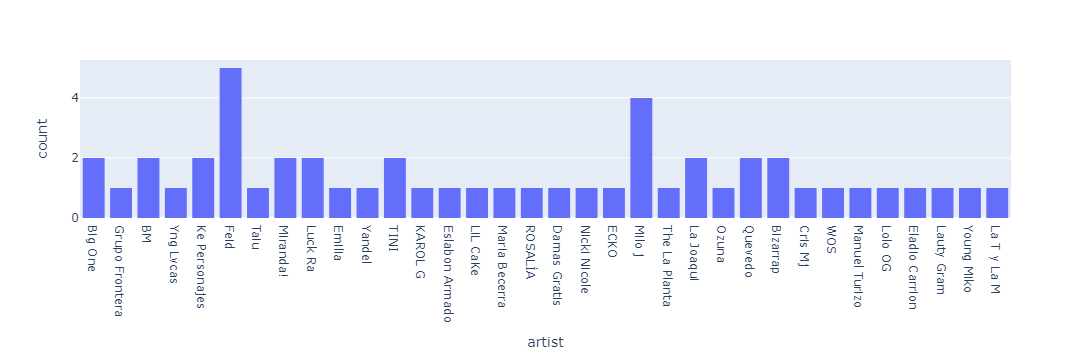

In [15]:
px.histogram(data_frame=df,x=df['artist'])

In [16]:
def transform_data(df: pd.DataFrame) -> bool:
    
    if df.empty:
        raise Exception("error: dataframe is empty")
        
    if df['rank'].dtype != 'int64':
        raise Exception("error: ranking is not numeric type")

    if df.shape[0] !=50:
        raise Exception("error: dataframe size is not 50")
    
    if df.isnull().values.any() == 1:
        raise Exception("error: null values")
        
    df['date'] = pd.to_datetime(df['date'])
    return 1


In [17]:
if transform_data(df):
    print('data validated succesfully')

data validated succesfully


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    50 non-null     object        
 1   artist  50 non-null     object        
 2   rank    50 non-null     int64         
 3   date    50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ KB
